**Описание проекта**

В IT-компанию, которая выполняет на заказ проекты по машинному обучению, обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а надой был вкусным — строго по его критериям.

Фермер просит разработать модель МО, которая поможет управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах.

Необходимо создать две прогнозные модели для отбора бурёнок в поголовье:

- Прогнозирование возможного удоя коровы (целевой признак — Удой).
- Расчет вероятности получить вкусное молоко от коровы (целевой признак — Вкус молока).

С помощью модели нужно отобрать коров по двум критериям: средний удой за год, при увеличении количественных показателей корма на 5%, — не менее 6000 килограммов; а молоко должно быть вкусным.

**План исследования**

1. Получение данных о коровах фермера и фирмы «ЭкоФерма».
2. Предобработка данных. Поиск и удаление пропусков, явных и неявных дубликатов. Приведение названий и типов данных признаков к нормальному виду.
3. Исследование данных. Визуализация распределения категориальных и количественных признаков. Поиск и удаление выбросов.
4. Корреляционный анализ. Построение матрицы корреляций и диаграмм рассеяния признака "Удой" с другими количественными признаками с учетом категориальных характеристик.
5. Обучение моделей линейной регрессии: простой модели, с добавлением нелинейной зависимости признаков и с учетом дополнительной характеристики "Имя папы коровы". Выбор лучшей модели линейной регрессии для предсказания удоя коров «ЭкоФермы».
6. Обучение модели логической регрессии по целевому признаку "Вкус молока". Прогноз вкуса молока для коров «ЭкоФермы» по оценке фермера.

Вывод с рекомендациями для фермера о покупке коров фирмы «ЭкоФерма» на основе разработанных моделей МО.


In [ ]:
# Импорт библиотек
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm

# Библиотеки для визуализации
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from re import template

# Библиотеки МО
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Метрики линейной регрессии
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve # добавлена функция

# Метрики логистической регрессии
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

## Загрузка данных

In [ ]:
farm_data = pd.read_csv('/datasets/ferma_main.csv', delimiter=';')
dads_data = pd.read_csv('/datasets/ferma_dad.csv', delimiter=';')
cows_data = pd.read_csv('/datasets/cow_buy.csv', delimiter=';')

In [ ]:
farm_data.head(10)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
5,6,5254,"12,7",1806,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,13","3,078",вкусно,менее_2_лет
6,7,5910,"13,2",1792,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,48","3,077",вкусно,более_2_лет
7,8,6179,"14,7",1806,"0,93",Вис Бик Айдиал,Равнинные,Айдиал,"3,55","3,076",вкусно,более_2_лет
8,9,6783,"14,2",1918,"0,94",РефлешнСоверинг,Холмистое,Айдиал,"3,71","3,077",вкусно,более_2_лет
9,10,5339,"13,4",1791,"0,895",Вис Бик Айдиал,Холмистое,Соверин,"3,13","3,075",вкусно,менее_2_лет


In [ ]:
farm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            



```
# Выбран кодовый формат
```

<div class='alert alert-info'><b>

Комментарий:</b>
    
Загружен файл farm_data с данными о фермерском стаде. Таблица содержит 12 колонок и 634 строки без пропусков.
    
Характеристики коров:

- id — уникальный идентификатор;     
- Порода  — порода коровы;
- порода папы_быка  — порода папы коровы;
- Возраст — возраст(менее_2_лет, более_2_лет).
    
Харатктеристики корма:
    
- ЭКЕ (Энергетическая кормовая единица)  — показатель питательности;
- Сырой протеин, г — сырой протеин корма (в граммах)
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину.
    
Тип пастбища — ландшафт лугов, на которых паслась корова.
    
Характеристика молока:
    
- Удой, кг — масса молока, которую корова даёт в год (в килограммах):
- Жирность,% — содержание жиров (в процентах);
- Белок,% — содержание белков (в процентах);
- Вкус молока — оценка вкуса по критериям фермера (вкусно, не вкусно).
  
</div>


In [ ]:
dads_data.head(10)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


In [ ]:
dads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


<div class='alert alert-info'><b>

Комментарий:</b>
    
Загружен файл dads_data с данными о папе коровы. Таблица содержит 2 колони и 629 строк без пропусков.

Данные таблицы:
    
- id — уникальный идентификатор коровы;     
- Имя Папы — имя папы коровы.

  
</div>


In [ ]:
cows_data.head(10)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


In [ ]:
cows_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


<div class='alert alert-info'><b>

Комментарий:</b>
    
Загружен файл cows_data с данными о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.

Таблица содержит 7 колонок и 20 строк без пропусков.

Данные о коровах «ЭкоФермы»:
    
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

В датафрейме содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
Параметры корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют.
Также нет характеристик: Удой, кг и Вкус молока.
  
</div>


##  Предобработка данных

<div class='alert alert-info'><b>

Комментарий:</b>
    
Датафреймы farm_data, dads_data и cows_data не имеют пропусков данных, но необходимо привести назавания столбцов в нормальный вид.

В таблице farm_data нужно изменить тип данных ЭКЕ (Энергетическая кормовая единица), СПО (Сахаро-протеиновое соотношение), Жирность,%, Белок,% с object на float.

В таблице cows_data нужно изменить тип данных Текущая_жирность,%, Текущий_уровень_белок,% с object на float.
    
Также необходимо провести проверку таблиц на явные и неявные дубликаты.
  
</div>


### Предобработка данных таблицы farm_data

In [ ]:
# Преобразование названий столбцов к нижнему регистру
farm_data.columns = map(str.lower, farm_data.columns)

# Словарь для переименования столбцов
renaming_dict = {
    'id': 'id',
    'удой, кг': 'milk_yield_kg',
    'эке (энергетическая кормовая единица)': 'eke_energy_feed_unit',
    'сырой протеин, г': 'raw_protein_g',
    'спо (сахаро-протеиновое соотношение)': 'spo_ratio',
    'порода': 'breed',
    'тип пастбища': 'pasture_type',
    'порода папы_быка': 'bull_breed',
    'жирность,%': 'fat_percentage',
    'белок,%': 'protein_percentage',
    'вкус молока': 'milk_taste',
    'возраст': 'age'
}

# Переименовываем столбцы
farm_data.rename(columns=renaming_dict, inplace=True)

# Новые имена столбцов
farm_data.head()

,id,milk_yield_kg,eke_energy_feed_unit,raw_protein_g,spo_ratio,breed,pasture_type,bull_breed,fat_percentage,protein_percentage,milk_taste,age
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [ ]:
# Проверяем наличие полных дубликатов строк
duplicated_rows = farm_data.duplicated()
print("Количество дублированных строк:", duplicated_rows.sum())

# Конкретные строки-дубликаты
duplicates = farm_data[duplicated_rows]
duplicates

Количество дублированных строк: 5


,id,milk_yield_kg,eke_energy_feed_unit,raw_protein_g,spo_ratio,breed,pasture_type,bull_breed,fat_percentage,protein_percentage,milk_taste,age
629,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
630,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
633,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


In [ ]:
# Удаляем дубликаты строк
farm_data.drop_duplicates(inplace=True)

# Проверяем наличие полных дубликатов строк
duplicated_rows = farm_data.duplicated()
print("Количество дублированных строк:", duplicated_rows.sum())

Количество дублированных строк: 0


In [ ]:
# Просмотр уникальных значений
print(farm_data['breed'].unique())   # Уникальные породы
print(farm_data['pasture_type'].unique())   # Уникальные типы пастбищ
print(farm_data['bull_breed'].unique())   # Уникальные породы быков

['Вис Бик Айдиал' 'РефлешнСоверинг']
['Равнинное' 'Равнинные' 'Холмистое']
['Айдиал' 'Соверин' 'Айдиалл']


In [ ]:
# Замена неявных дубликатов 'Равнинные' на 'Равнинное' в колонке pasture_type
farm_data['pasture_type'] = farm_data['pasture_type'].replace('Равнинные', 'Равнинное')
print(farm_data['pasture_type'].unique())   # Уникальные типы пастбищ

['Равнинное' 'Холмистое']


In [ ]:
# Замена неявных дубликатов 'Айдиалл' на 'Айдиал' в колонке bull_breed
farm_data['bull_breed'] = farm_data['bull_breed'].replace('Айдиалл', 'Айдиал')
print(farm_data['bull_breed'].unique())   # Уникальные породы быков

['Айдиал' 'Соверин']


In [ ]:
# Преобразуем типы данных в колонках с object на float64
# Замена запятых на точки и преобразование в float
columns_to_convert = ['eke_energy_feed_unit', 'spo_ratio', 'fat_percentage', 'protein_percentage']

for column in columns_to_convert:
    farm_data[column] = farm_data[column].str.replace(',', '.').astype(float)

farm_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    629 non-null    int64  
 1   milk_yield_kg         629 non-null    int64  
 2   eke_energy_feed_unit  629 non-null    float64
 3   raw_protein_g         629 non-null    int64  
 4   spo_ratio             629 non-null    float64
 5   breed                 629 non-null    object 
 6   pasture_type          629 non-null    object 
 7   bull_breed            629 non-null    object 
 8   fat_percentage        629 non-null    float64
 9   protein_percentage    629 non-null    float64
 10  milk_taste            629 non-null    object 
 11  age                   629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


### Предобработка данных таблицы dads_data

In [ ]:
# Приведение к нижнему регистру
dads_data.columns = dads_data.columns.str.lower()

# Наименования строк
renaming_dict = {
    'id': 'id',
    'имя папы': 'dad_name'
}

# Переименовываем столбцы
dads_data.rename(columns=renaming_dict, inplace=True)

dads_data.head()


,id,dad_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [ ]:
# Проверяем наличие полных дубликатов строк
duplicated_rows = dads_data.duplicated()
print("Количество дублированных строк:", duplicated_rows.sum())

Количество дублированных строк: 0


In [ ]:
# Просмотр уникальных имен папы коровы
print(dads_data['dad_name'].unique())

['Буйный' 'Соловчик' 'Барин' 'Геркулес']


### Предобработка данных таблицы cows_data

In [ ]:
# Преобразование названий столбцов к нижнему регистру
cows_data.columns = map(str.lower, cows_data.columns)

# Словарь для переименования столбцов
renaming_dict = {
    'порода': 'breed',
    'тип пастбища': 'pasture_type',
    'порода папы_быка': 'bull_breed',
    'имя_папы': 'dad_name',
    'текущая_жирность,%': 'fat_percentage',
    'текущий_уровень_белок,%': 'protein_percentage',
    'возраст': 'age'
}

# Переименовываем столбцы
cows_data.rename(columns=renaming_dict, inplace=True)

# Новые имена столбцов
cows_data.head()

,breed,pasture_type,bull_breed,dad_name,fat_percentage,protein_percentage,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [ ]:
# Проверяем наличие полных дубликатов строк
duplicated_rows = cows_data.duplicated()
print("Количество дублированных строк:", duplicated_rows.sum())

# Конкретные строки-дубликаты
duplicates = cows_data[duplicated_rows]
duplicates

Количество дублированных строк: 4


,breed,pasture_type,bull_breed,dad_name,fat_percentage,protein_percentage,age
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


[Текст ссылки](https://)<div class='alert alert-info'><b>

🎓 Комментарий:</b>
    
В таблице 20 коров, предложенных к покупке. Возможно параметры некоторых совпадают, поэтому необходимо оставить в датафрейме все строки.
</div>


In [ ]:
# Просматриваем уникальные значения
print(cows_data['breed'].unique())
print(cows_data['pasture_type'].unique())
print(cows_data['bull_breed'].unique())
print(cows_data['dad_name'].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']
['холмистое' 'равнинное']
['Айдиал' 'Соверин']
['Геркулес' 'Буйный' 'Барин' 'Соловчик']


In [ ]:
# Замена характеристик пастбища в колонке pasture_type на слова с большой буквы
cows_data['pasture_type'] = cows_data['pasture_type'].replace('равнинное', 'Равнинное')
cows_data['pasture_type'] = cows_data['pasture_type'].replace('холмистое', 'Холмистое')
print(cows_data['pasture_type'].unique())   # Уникальные типы пастбищ

['Холмистое' 'Равнинное']


In [ ]:
# Преобразуем типы данных в колонках с object на float64
# Замена запятых на точки и преобразование в float
columns_to_convert = ['fat_percentage', 'protein_percentage']

for column in columns_to_convert:
    cows_data[column] = cows_data[column].str.replace(',', '.').astype(float)

cows_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   breed               20 non-null     object 
 1   pasture_type        20 non-null     object 
 2   bull_breed          20 non-null     object 
 3   dad_name            20 non-null     object 
 4   fat_percentage      20 non-null     float64
 5   protein_percentage  20 non-null     float64
 6   age                 20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB






<div class='alert alert-info'><b>

Комментарий:</b>
    
Выполнена предобработка данных датафреймов farm_data, dads_data и cows_data. Приведены назавания столбцов в нормальный вид.

В таблице farm_data и cows_data изменены типы данных колонок eke_energy_feed_unit, spo_ratio, fat_percentage, protein_percentage с object на float.

Проведена проверка таблиц на явные и неявные дубликаты. В датафрейме farm_data удалены 5 полных дубликатов, а в cows_data - 4. в колонках таблицы farm_data 'pasture_type' и 'bull_breed' удалены неявные дубликаты 'Равнинные' и 'Айдиалл' соотвественно. В таблице cows_data тип пастбища записан с большой буквы, как в таблице farm_data.  

Датафреймы farm_data, dads_data и cows_data подготовлены к исследовательскому анализу данных.
</div>


## Исследовательский анализ данных

### Исследовательский анализ данных таблицы farm_data

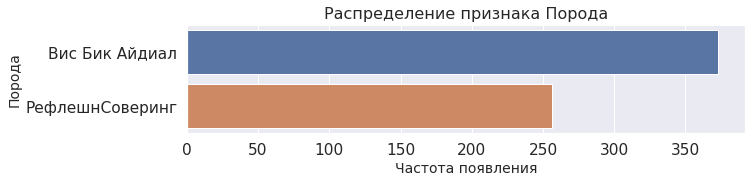

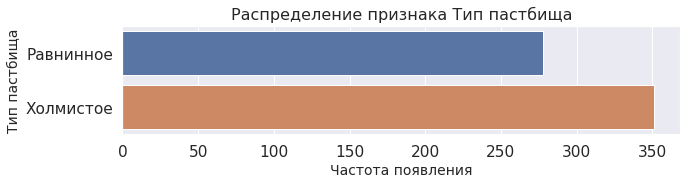

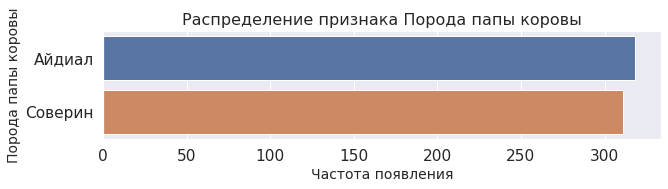

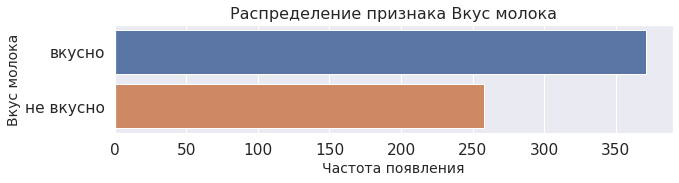

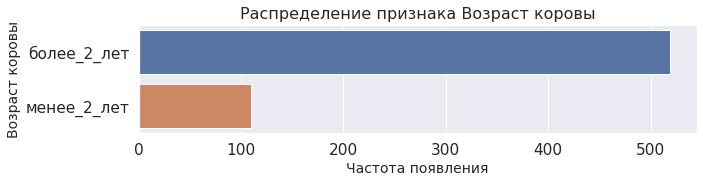

In [ ]:
# Категориальные признаки
cat_features = ['breed', 'pasture_type', 'bull_breed', 'milk_taste', 'age']

# Словарь для названий признаков
feature_labels = {
    'breed': 'Порода',
    'pasture_type': 'Тип пастбища',
    'bull_breed': 'Порода папы коровы',
    'milk_taste': 'Вкус молока',
    'age': 'Возраст коровы'
}

# Цикл по каждому признаку
for feature in cat_features:
    plt.figure(figsize=(10, 2))  # Устанавливаем размер графика

    # Строим гистограмму
    sns.countplot(y=feature, data=farm_data)

    # Добавляем подписи осей и заголовок
    plt.xlabel('Частота появления', fontsize=14)
    plt.ylabel(feature_labels.get(feature, feature).capitalize(), fontsize=14)
    plt.title(f'Распределение признака {feature_labels.get(feature, feature)}', fontsize=16)

    plt.show()

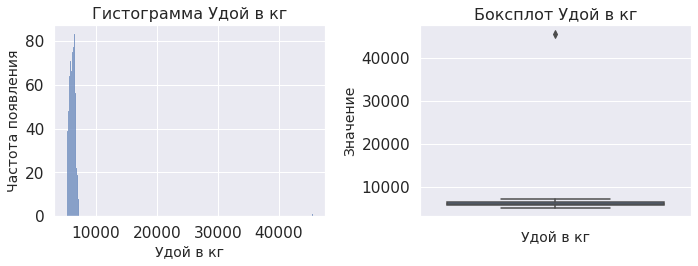

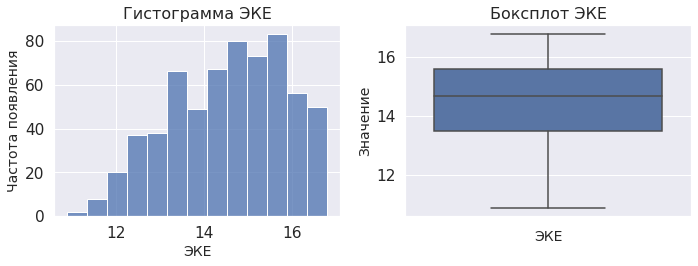

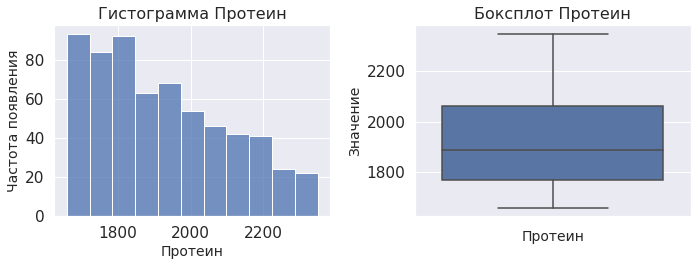

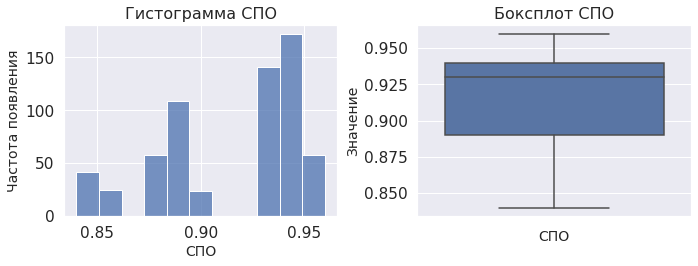

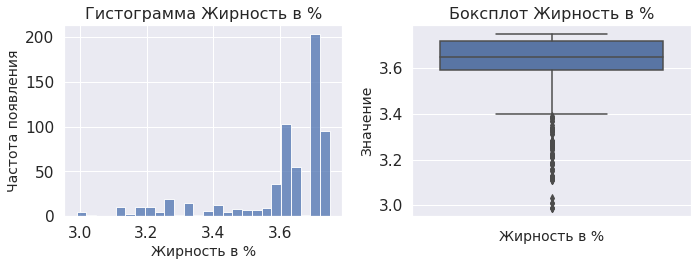

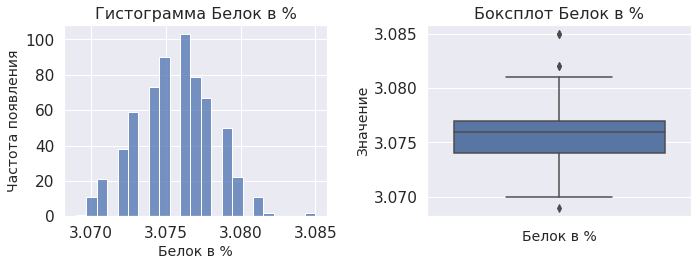

In [ ]:
# Количественные признаки
num_features = ['milk_yield_kg', 'eke_energy_feed_unit', 'raw_protein_g', 'spo_ratio', 'fat_percentage', 'protein_percentage']

# Словарь для названий признаков
feature_labels = {
    'milk_yield_kg': 'Удой в кг',
    'eke_energy_feed_unit': 'ЭКЕ',
    'raw_protein_g': 'Протеин',
    'spo_ratio': 'СПО',
    'fat_percentage': 'Жирность в %',
    'protein_percentage': 'Белок в %'
}

# Цикл по каждому признаку
for feature in num_features:
    plt.figure(figsize=(10, 4))  # Устанавливаем размер графика

    # Гистограмма
    plt.subplot(121)
    sns.histplot(farm_data[feature], kde=False)
    plt.xlabel(feature_labels.get(feature, feature), fontsize=14)
    plt.ylabel('Частота появления', fontsize=14)
    plt.title(f'Гистограмма {feature_labels.get(feature, feature)}', fontsize=16)

    # Ящик с усами
    plt.subplot(122)
    sns.boxplot(y=farm_data[feature])
    plt.xlabel(feature_labels.get(feature, feature), fontsize=14)
    plt.ylabel('Значение', fontsize=14)
    plt.title(f'Боксплот {feature_labels.get(feature, feature)}', fontsize=16)

    plt.tight_layout()
    plt.show()

In [ ]:
farm_data.describe()

,id,milk_yield_kg,eke_energy_feed_unit,raw_protein_g,spo_ratio,fat_percentage,protein_percentage
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


<div class='alert alert-info'><b>

Комментарий:</b>
    
В таблице farm_data значительный выброс в колонке milk_yield_kg. Удой 45616 кг в год не выглядит правдоподобным.
Необходимо в датафреймах farm_data и cows_data удалить строку с id коровы с аномальным значением удоя молока.
</div>

In [ ]:
# Нахождение индекса строки с максимальным значением в колонке milk_yield_kg
index_max_milk_yield = farm_data['milk_yield_kg'].idxmax()

# Распечатывание соответствующей строки
print(farm_data.loc[index_max_milk_yield])

id                                  17
milk_yield_kg                    45616
eke_energy_feed_unit              11.5
raw_protein_g                     1675
spo_ratio                         0.93
breed                   Вис Бик Айдиал
pasture_type                 Холмистое
bull_breed                      Айдиал
fat_percentage                    3.22
protein_percentage               3.076
milk_taste                      вкусно
age                        более_2_лет
Name: 16, dtype: object


In [ ]:
# Удаление строк с выбросом по удою молока
farm_data = farm_data[~(farm_data['id'] == 17)]
dads_data = dads_data[~(dads_data['id'] == 17)]
farm_data.describe()

,id,milk_yield_kg,eke_energy_feed_unit,raw_protein_g,spo_ratio,fat_percentage,protein_percentage
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,315.474522,6125.968153,14.548726,1923.759554,0.913089,3.604268,3.075670
std,181.475367,475.857053,1.301777,182.832816,0.032221,0.168093,0.002551
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.750000,5749.750000,13.500000,1771.750000,0.890000,3.590000,3.074000
50%,315.500000,6132.500000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.250000,6501.000000,15.600000,2062.250000,0.940000,3.720000,3.077000
max,629.000000,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


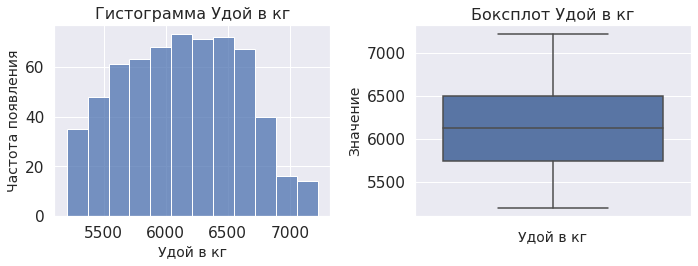

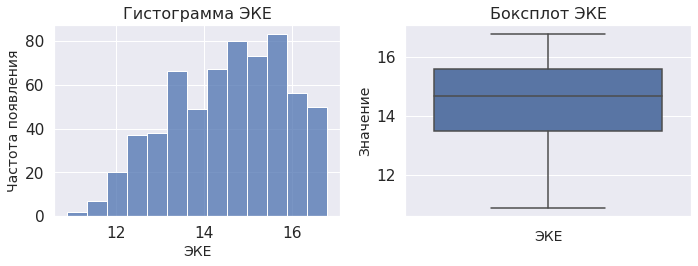

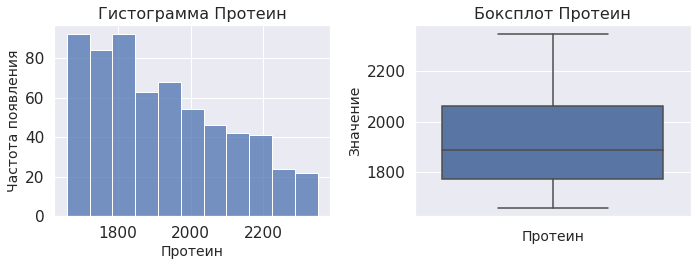

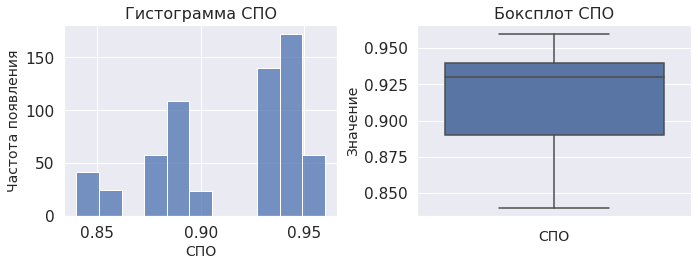

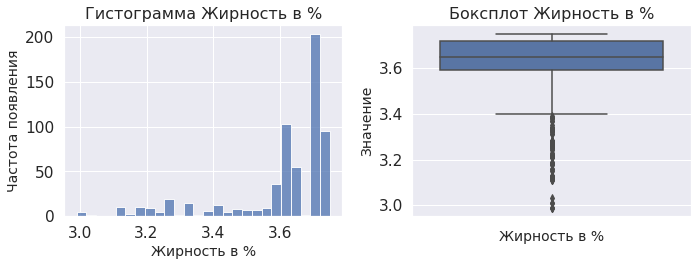

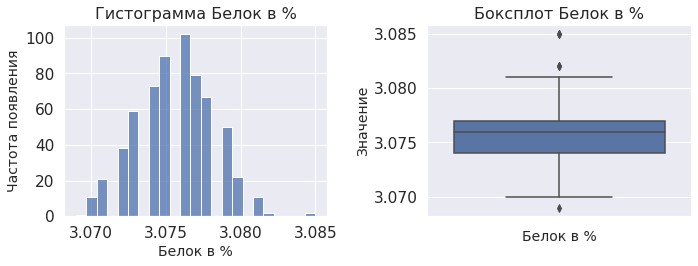

In [ ]:
# Количественные признаки
num_features = ['milk_yield_kg', 'eke_energy_feed_unit', 'raw_protein_g', 'spo_ratio', 'fat_percentage', 'protein_percentage']

# Словарь для названий признаков
feature_labels = {
    'milk_yield_kg': 'Удой в кг',
    'eke_energy_feed_unit': 'ЭКЕ',
    'raw_protein_g': 'Протеин',
    'spo_ratio': 'СПО',
    'fat_percentage': 'Жирность в %',
    'protein_percentage': 'Белок в %'
}

# Цикл по каждому признаку
for feature in num_features:
    plt.figure(figsize=(10, 4))  # Устанавливаем размер графика

    # Гистограмма
    plt.subplot(121)
    sns.histplot(farm_data[feature], kde=False)
    plt.xlabel(feature_labels.get(feature, feature), fontsize=14)
    plt.ylabel('Частота появления', fontsize=14)
    plt.title(f'Гистограмма {feature_labels.get(feature, feature)}', fontsize=16)

    # Ящик с усами
    plt.subplot(122)
    sns.boxplot(y=farm_data[feature])
    plt.xlabel(feature_labels.get(feature, feature), fontsize=14)
    plt.ylabel('Значение', fontsize=14)
    plt.title(f'Боксплот {feature_labels.get(feature, feature)}', fontsize=16)

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных таблицы dads_data

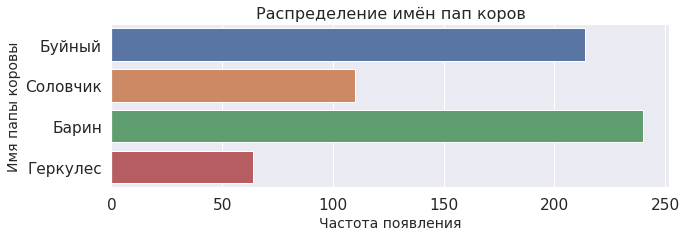

In [ ]:
# Строим гистограмму для категориального признака "dad_name"
plt.figure(figsize=(10, 3))  # Устанавливаем размер графика
sns.countplot(y="dad_name", data=dads_data)

# Добавляем подписи осей и заголовок
plt.xlabel('Частота появления', fontsize=14)
plt.ylabel('Имя папы коровы', fontsize=14)
plt.title('Распределение имён пап коров', fontsize=16)

plt.show()

### Исследовательский анализ данных таблицы cows_data

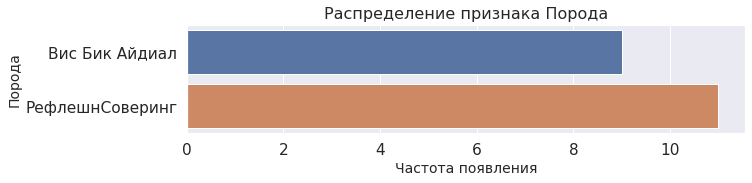

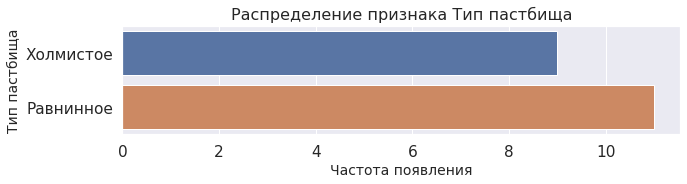

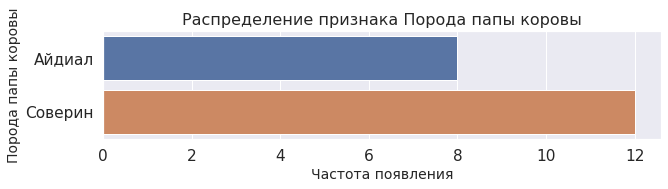

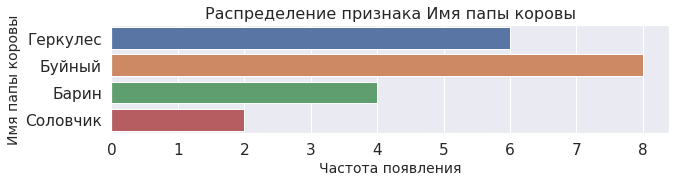

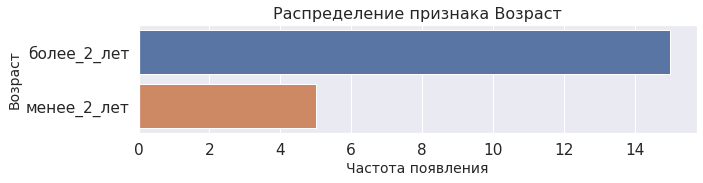

In [ ]:
# Категориальные признаки
cat_features = ['breed', 'pasture_type', 'bull_breed', 'dad_name', 'age']

# Словарь для названий признаков
feature_labels = {
    'breed': 'Порода',
    'pasture_type': 'Тип пастбища',
    'bull_breed': 'Порода папы коровы',
    'dad_name': 'Имя папы коровы',
    'age': 'Возраст'
}

# Цикл по каждому признаку
for feature in cat_features:
    plt.figure(figsize=(10, 2))  # Устанавливаем размер графика

    # Строим гистограмму
    sns.countplot(y=feature, data=cows_data)

    # Добавляем подписи осей и заголовок
    plt.xlabel('Частота появления', fontsize=14)
    plt.ylabel(feature_labels[feature], fontsize=14)
    plt.title(f'Распределение признака {feature_labels[feature]}', fontsize=16)

    plt.show()

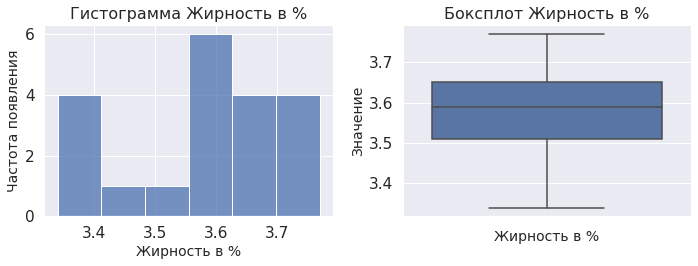

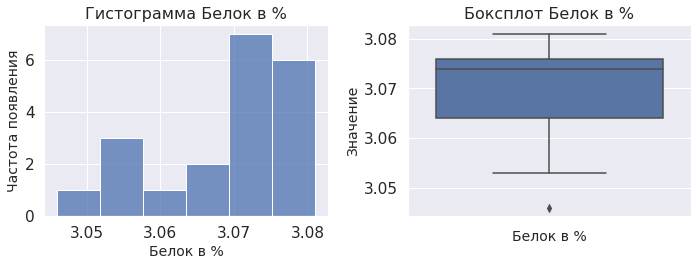

In [ ]:
# Числовые признаки
num_features = ['fat_percentage', 'protein_percentage']

# Словарь для названий признаков
feature_labels = {
    'fat_percentage': 'Жирность в %',
    'protein_percentage': 'Белок в %'
}

# Цикл по каждому признаку
for feature in num_features:
    plt.figure(figsize=(10, 4))  # Устанавливаем размер графика

    # Гистограмма
    plt.subplot(121)
    sns.histplot(cows_data[feature], kde=False)
    plt.xlabel(feature_labels.get(feature, feature), fontsize=14)
    plt.ylabel('Частота появления', fontsize=14)
    plt.title(f'Гистограмма {feature_labels.get(feature, feature)}', fontsize=16)

    # Боксплот
    plt.subplot(122)
    sns.boxplot(y=cows_data[feature])
    plt.xlabel(feature_labels.get(feature, feature), fontsize=14)
    plt.ylabel('Значение', fontsize=14)
    plt.title(f'Боксплот {feature_labels.get(feature, feature)}', fontsize=16)

    plt.tight_layout()
    plt.show()

In [ ]:
cows_data.describe()

,fat_percentage,protein_percentage
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


<div class='alert alert-info'><b>
Вывод по исследовательскому анализу:</b>
    
1. После удаления выброса 45616 кг, медианный удой коров в год - 6132,5 кг. Данные распределены нормально.

2. Медиана Энергетическая кормовая единицы - 14,7 единиц. График питательности корма смещен вправо.
    
3. Медиана Сахаро-протеинового соотношенич 0,93, график СПО смещен вправо.
    
4. Медианное содержания сырого протеина - 1888 г. график смещен влево.
    
5. Медиана содержания жиров в молоке - 3,65% в farm_data и 3,59% в cows_data. В стаде фермера есть выбросы в диапазоне 3,0-3,4%.

6. Медианное содержание белков в молоке - 3,076% в farm_data и 3,0695% в cows_data. В стаде фермера есть немного выбросов с двух сторон боксплота.

7. В стаде фермера возрастных коров старше 2 лет почти в пять раз больше. остальные категориальные признаки в farm_data сопоставимые. В cows_data молодых коров почти половина.
    
8. Самое популярное имя пап коров в стаде фермера - Барин. В cows_data преобладает имя Буйный.
    
</div>

## Корреляционный анализ

### Матрица корреляций

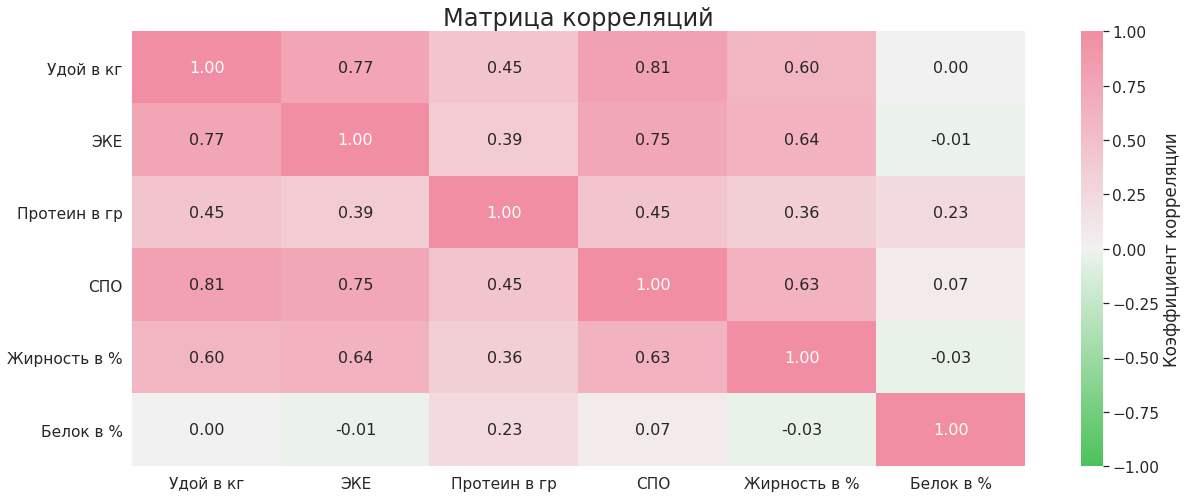

In [ ]:
# Данные для вычисления корреляционной матрицы
columns = ['milk_yield_kg', 'eke_energy_feed_unit', 'raw_protein_g', 'spo_ratio', 'fat_percentage', 'protein_percentage']
corr_matrix = farm_data[columns].corr()

# Визуализация матрицы корреляций
plt.figure(figsize=(20, 8))
sns.set(font_scale=1.4)

# Словарь для перевода названий колонок
column_labels = {
    'milk_yield_kg': 'Удой в кг',
    'eke_energy_feed_unit': 'ЭКЕ',
    'raw_protein_g': 'Протеин в гр',
    'spo_ratio': 'СПО',
    'fat_percentage': 'Жирность в %',
    'protein_percentage': 'Белок в %'
}

# Определяем цветовую карту
cmap = sns.diverging_palette(130, 0, s=80, l=70, as_cmap=True)

# Перевод в heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    annot_kws={"fontsize": 16},  # Размер шрифта аннотаций
    xticklabels=[column_labels.get(col, col) for col in corr_matrix.columns],  # Подписи для X
    yticklabels=[column_labels.get(col, col) for col in corr_matrix.index],  # Подписи для Y
    cbar_kws={'label': 'Коэффициент корреляции'},  # Добавляем подпись для шкалы цвета
    vmin=-1,  # Минимальное значение для цветовой шкалы
    vmax=1,   # Максимальное значение для цветовой шкалы
    cmap=cmap  # Используем созданную цветовую карту
)

# Заголовок
plt.title('Матрица корреляций', fontsize=24)
plt.show()


### Диаграмма рассеяния по типу пастбища

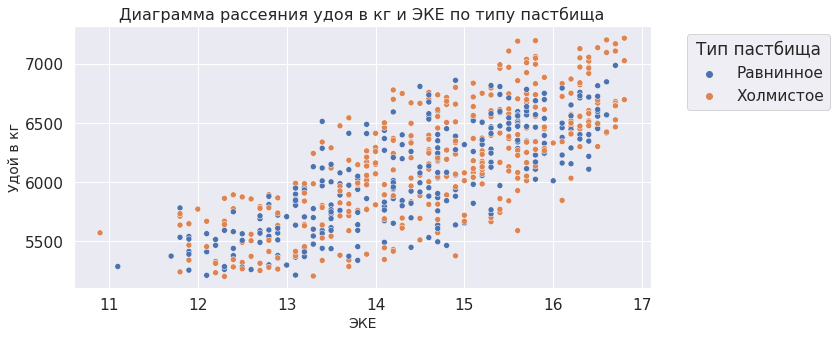

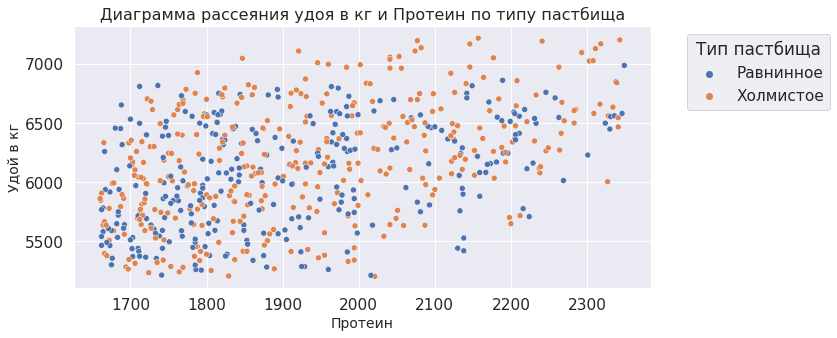

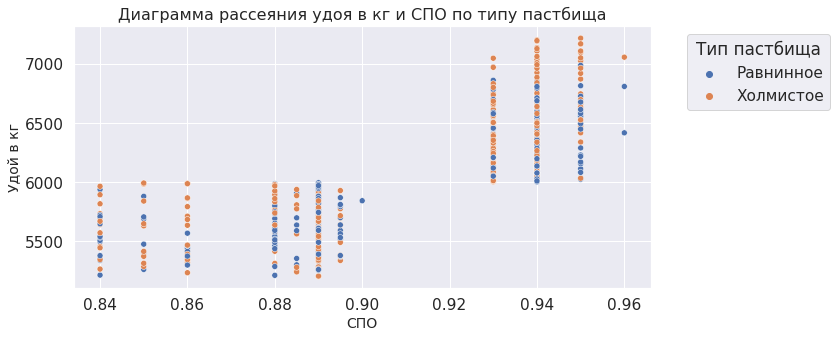

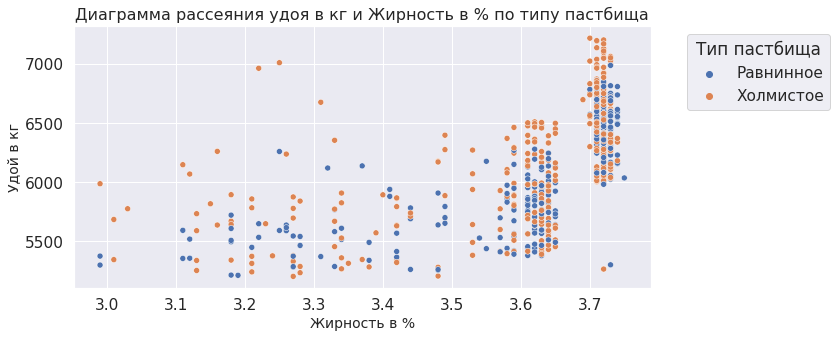

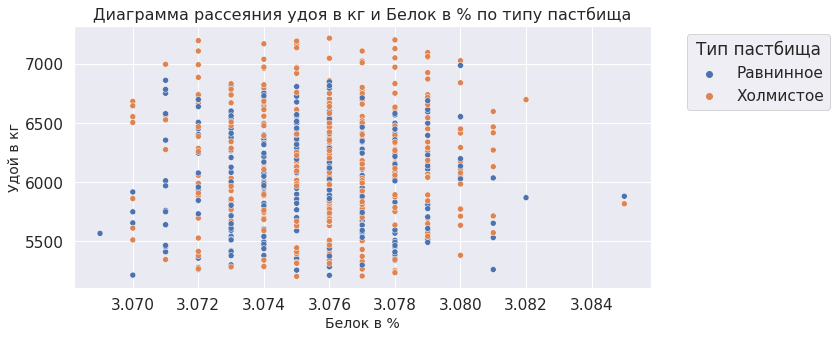

In [ ]:
# Перевод названий признаков
signatures = {
    'milk_yield_kg': 'Удой в кг',
    'eke_energy_feed_unit': 'ЭКЕ',
    'raw_protein_g': 'Протеин',
    'spo_ratio': 'СПО',
    'fat_percentage': 'Жирность в %',
    'protein_percentage': 'Белок в %'
}

# Количественные признаки, кроме milk_yield_kg
quantitative_features = ['eke_energy_feed_unit', 'raw_protein_g', 'spo_ratio', 'fat_percentage', 'protein_percentage']

# Категориальный признак
categorical_feature = 'pasture_type'

# Цикл по каждому количественному признаку
for feature in quantitative_features:
    # Построение диаграммы рассеяния
    plt.figure(figsize=(12, 5))  # Устанавливаем размер фигуры
    sns.scatterplot(x=feature, y='milk_yield_kg', hue=categorical_feature, data=farm_data)

    # Настройки графики
    plt.xlabel(signatures.get(feature, feature), fontsize=14)  # Подписи осей
    plt.ylabel(signatures['milk_yield_kg'], fontsize=14)
    plt.title(f'Диаграмма рассеяния удоя в кг и {signatures.get(feature, feature)} по типу пастбища', fontsize=16)
    plt.legend(title='Тип пастбища', bbox_to_anchor=(1.05, 1), loc='upper left')  # Легенда для категории

    plt.tight_layout()  # Улучшение компоновки графиков
    plt.show()


### Диаграмма рассеяния по породе коровы

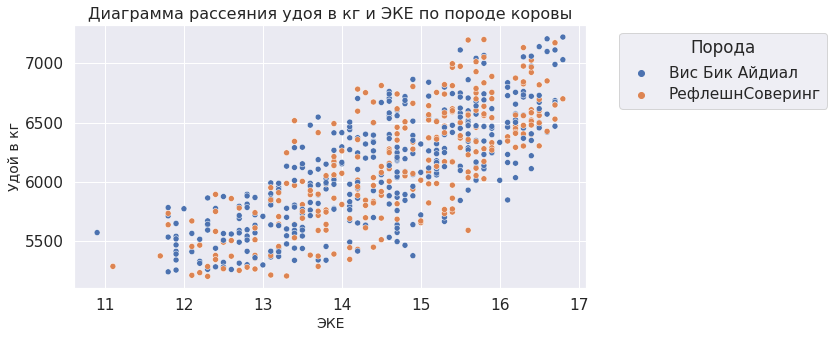

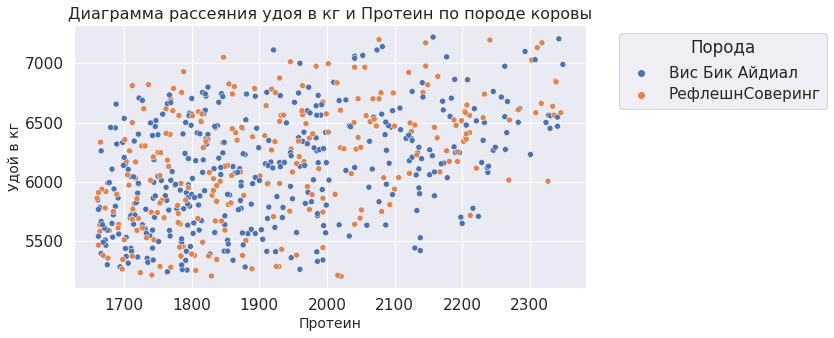

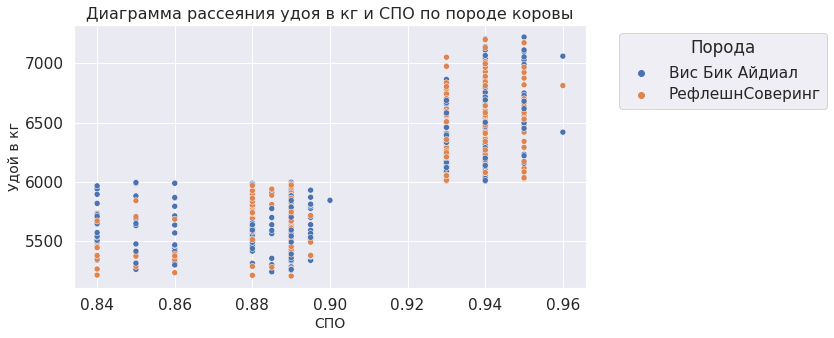

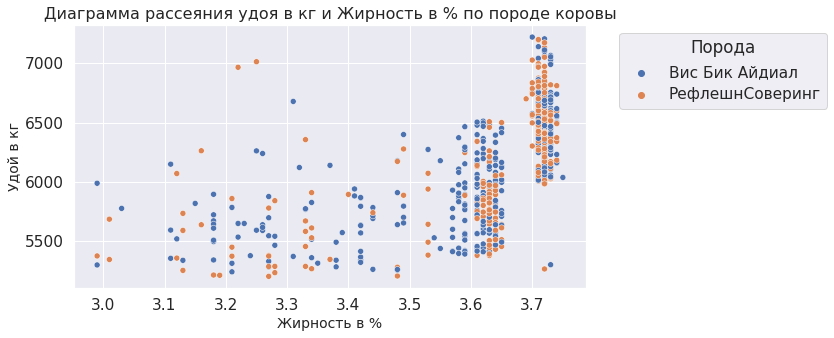

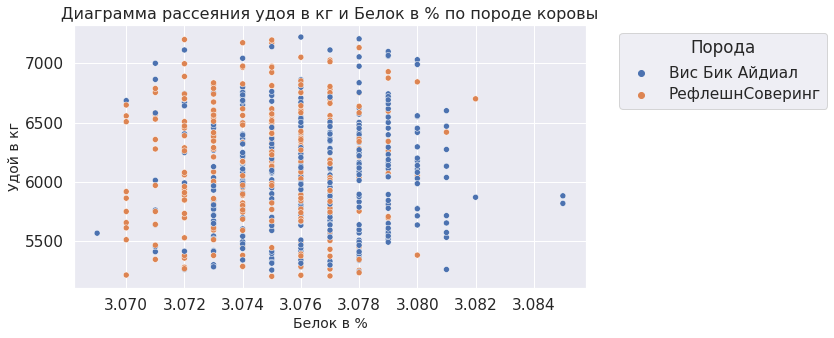

In [ ]:
# Перевод названий признаков
signatures = {
    'milk_yield_kg': 'Удой в кг',
    'eke_energy_feed_unit': 'ЭКЕ',
    'raw_protein_g': 'Протеин',
    'spo_ratio': 'СПО',
    'fat_percentage': 'Жирность в %',
    'protein_percentage': 'Белок в %'
}

# Количественные признаки, кроме milk_yield_kg
quantitative_features = ['eke_energy_feed_unit', 'raw_protein_g', 'spo_ratio', 'fat_percentage', 'protein_percentage']

# Категориальный признак
categorical_feature = 'breed'

# Цикл по каждому количественному признаку
for feature in quantitative_features:
    # Построение диаграммы рассеяния
    plt.figure(figsize=(12, 5))  # Устанавливаем размер фигуры
    sns.scatterplot(x=feature, y='milk_yield_kg', hue=categorical_feature, data=farm_data)

    # Настройки графики
    plt.xlabel(signatures.get(feature, feature), fontsize=14)  # Подписи осей
    plt.ylabel(signatures['milk_yield_kg'], fontsize=14)
    plt.title(f'Диаграмма рассеяния удоя в кг и {signatures.get(feature, feature)} по породе коровы', fontsize=16)
    plt.legend(title='Порода', bbox_to_anchor=(1.05, 1), loc='upper left')  # Легенда для категории

    plt.tight_layout()  # Улучшение компоновки графиков
    plt.show()


### Диаграмма рассеяния по возрасту коровы

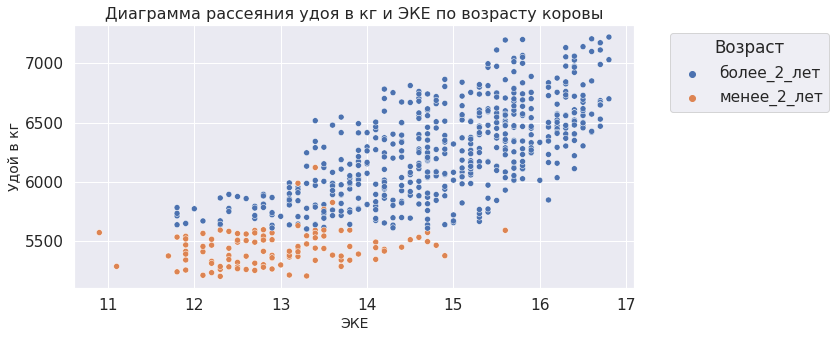

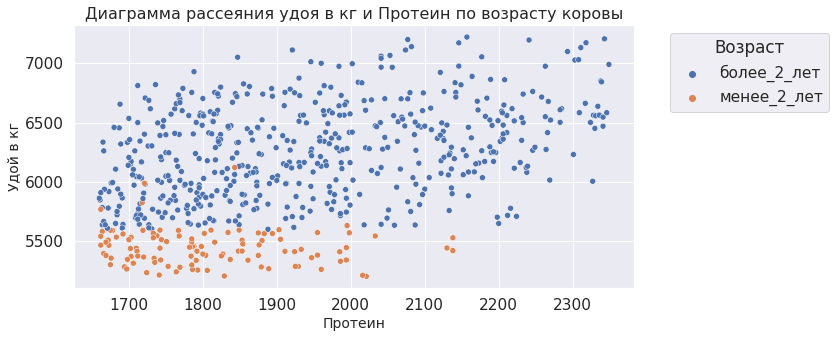

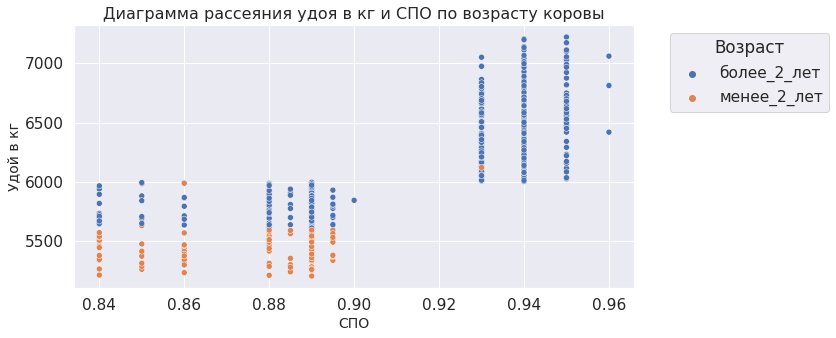

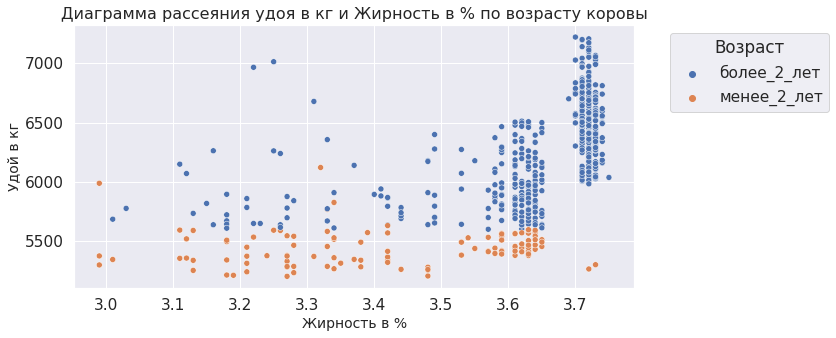

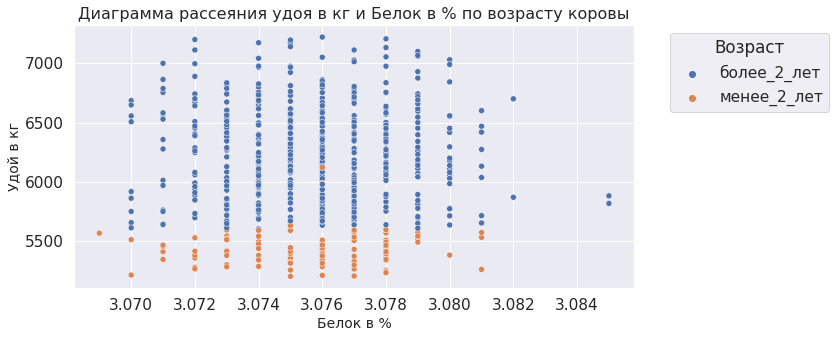

In [ ]:
# Перевод названий признаков
signatures = {
    'milk_yield_kg': 'Удой в кг',
    'eke_energy_feed_unit': 'ЭКЕ',
    'raw_protein_g': 'Протеин',
    'spo_ratio': 'СПО',
    'fat_percentage': 'Жирность в %',
    'protein_percentage': 'Белок в %'
}

# Количественные признаки, кроме milk_yield_kg
quantitative_features = ['eke_energy_feed_unit', 'raw_protein_g', 'spo_ratio', 'fat_percentage', 'protein_percentage']

# Категориальный признак
categorical_feature = 'age'

# Цикл по каждому количественному признаку
for feature in quantitative_features:
    # Построение диаграммы рассеяния
    plt.figure(figsize=(12, 5))  # Устанавливаем размер фигуры
    sns.scatterplot(x=feature, y='milk_yield_kg', hue=categorical_feature, data=farm_data)

    # Настройки графики
    plt.xlabel(signatures.get(feature, feature), fontsize=14)  # Подписи осей
    plt.ylabel(signatures['milk_yield_kg'], fontsize=14)
    plt.title(f'Диаграмма рассеяния удоя в кг и {signatures.get(feature, feature)} по возрасту коровы', fontsize=16)
    plt.legend(title='Возраст', bbox_to_anchor=(1.05, 1), loc='upper left')  # Легенда для категории

    plt.tight_layout()  # Улучшение компоновки графиков
    plt.show()


### Диаграмма рассеяния по породе папы коровы

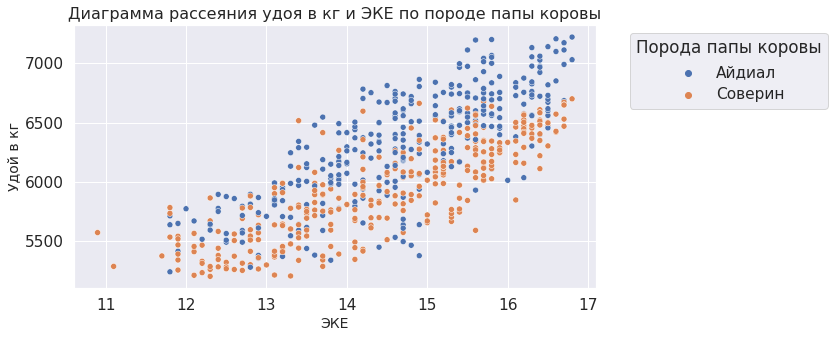

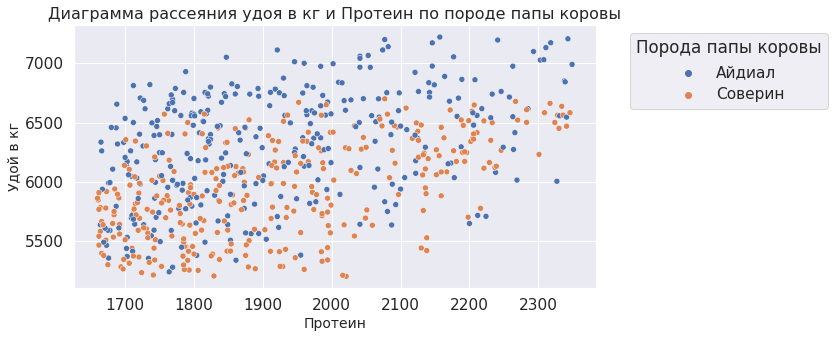

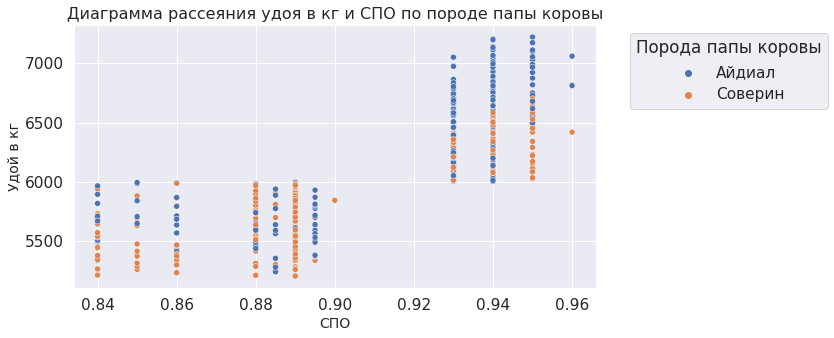

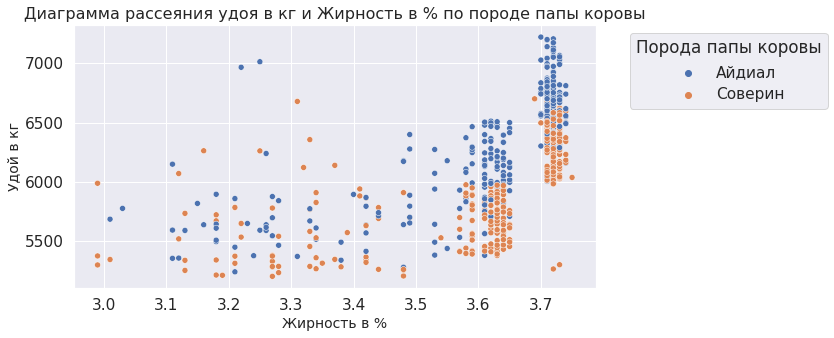

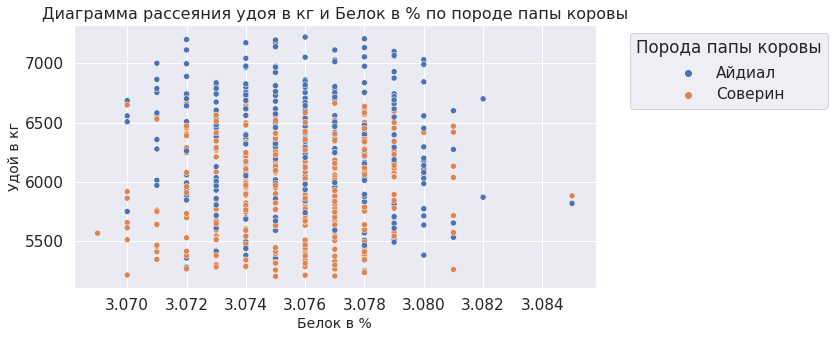

In [ ]:
# Перевод названий признаков
signatures = {
    'milk_yield_kg': 'Удой в кг',
    'eke_energy_feed_unit': 'ЭКЕ',
    'raw_protein_g': 'Протеин',
    'spo_ratio': 'СПО',
    'fat_percentage': 'Жирность в %',
    'protein_percentage': 'Белок в %'
}

# Количественные признаки, кроме milk_yield_kg
quantitative_features = ['eke_energy_feed_unit', 'raw_protein_g', 'spo_ratio', 'fat_percentage', 'protein_percentage']

# Категориальный признак
categorical_feature = 'bull_breed'

# Цикл по каждому количественному признаку
for feature in quantitative_features:
    # Построение диаграммы рассеяния
    plt.figure(figsize=(12, 5))  # Устанавливаем размер фигуры
    sns.scatterplot(x=feature, y='milk_yield_kg', hue=categorical_feature, data=farm_data)

    # Настройки графики
    plt.xlabel(signatures.get(feature, feature), fontsize=14)  # Подписи осей
    plt.ylabel(signatures['milk_yield_kg'], fontsize=14)
    plt.title(f'Диаграмма рассеяния удоя в кг и {signatures.get(feature, feature)} по породе папы коровы', fontsize=16)
    plt.legend(title='Порода папы коровы', bbox_to_anchor=(1.05, 1), loc='upper left')  # Легенда для категории

    plt.tight_layout()  # Улучшение компоновки графиков
    plt.show()

<div class='alert alert-info'><b>
Вывод по корреляционному анализу:</b>
    
1. Между удоем коровы и питательностью корма зависимость высокая, коэффициент Пирсона 0,77.
    
2. Зависимость удоя и содержания сырого протеина в корме слабее - 0,45.
    
3. Диаграмма рассеяния удоя коровы и СПО (сахаро-протеиновым отношением) разделена на две области со значение СПО 0,84-0,90 и 0,93-0,96. Признак СПО можно перевести в категориальный тип.
    
4. Между удоем коровы и содержанием белков в % нет связи.   
    
5. Зависимость между удоем и содержанием жиров в % с коэффициентом 0,60 показывает, что производительные коровы дают более жирное молоко.

6. Показатели молодых коров хуже, чем у возрастных.

7. Мультиколлинеарности входных признаков нет.
    
</div>

## Обучение модели линейной регрессии

### Обучение первой модели LinearRegression





<div class='alert alert-info'><b>
Комментарии:</b>
    
Подготовим данные датасета ferma_main.csv и обучим первую модель LinearRegression. Используем в качестве целевого признак "Удой, кг".
    
Отберем признаки, которые подходят для модели линейной регрессии

Количественные: eke_energy_feed_unit, raw_protein_g, spo_ratio, fat_percentage, protein_percentage.

Категориальные: breed, pasture_type, bull_breed, age.

Исключен признак: 'milk_taste', субъективный параметр, не имеющий с удоем причинно-следственной связи

Обоснование выбора признаков: Энергетическая ценность корма, содержание протеина и тип пастбища напрямую влияют на продуктивность. Порода коров и быка определяют генетический потенциал. Возраст связан с физиологической производительностью.</div>

R²: 0.7880
MSE: 43146.7995
MAE: 161.7814
RMSE: 207.7181
Дисперсия остатков: 42430.3975


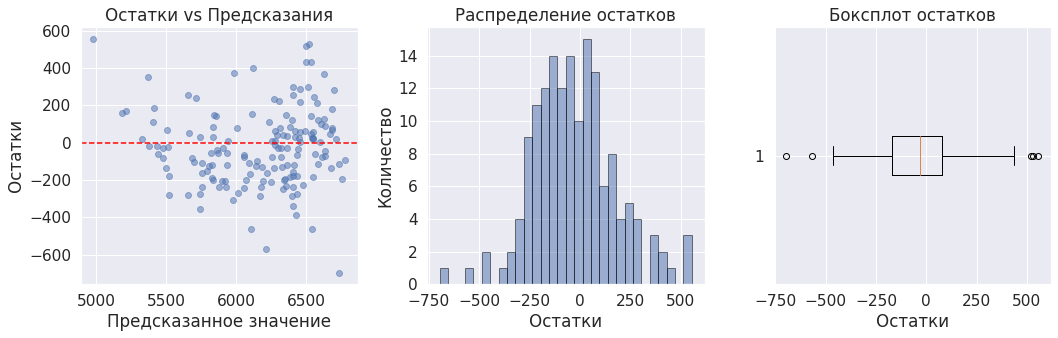

In [ ]:
# Выбор признаков
numeric_features = ['eke_energy_feed_unit', 'raw_protein_g', 'spo_ratio',
                    'fat_percentage', 'protein_percentage']
categorical_features = ['breed', 'pasture_type', 'bull_breed', 'age']

# Разделение на train/test
X = farm_data[categorical_features + numeric_features]
y = farm_data['milk_yield_kg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Настройка преобразователей для числовых и категориальных признаков
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first")  # Добавлен drop="first"

# Инициализация ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])

# Инициализация ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])

# Создание пайплайна для моделирования
model_1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Обучение модели
model_1.fit(X_train, y_train)

# Прогнозирование
y_pred = model_1.predict(X_test)

# Оценка качества модели
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.4f}")

# Расчет метрик MSE, MAE и RMSE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# Анализ остатков
residuals = y_test - y_pred

# Расчет дисперсии остатков
variance_residuals = np.var(residuals)
print(f"Дисперсия остатков: {variance_residuals:.4f}")

# Построение графиков
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(y_pred, residuals, alpha=0.5)
ax1.axhline(0, color='red', linestyle='--')
ax1.set_xlabel('Предсказанное значение')
ax1.set_ylabel('Остатки')
ax1.set_title('Остатки vs Предсказания')

ax2.hist(residuals, bins=30, edgecolor='black', alpha=0.5)
ax2.set_xlabel('Остатки')
ax2.set_ylabel('Количество')
ax2.set_title('Распределение остатков')

ax3.boxplot(residuals, vert=False)
ax3.set_xlabel('Остатки')
ax3.set_title('Боксплот остатков')

plt.tight_layout()
plt.show()


*Курсив*<div class='alert alert-info'><b>
Комментарии:</b>
    
Удален первый фиктивный столбец, который может появиться после выполнения OneHotEncoding для категориальных переменных</div>

<div class='alert alert-info'><b>
Вывод:</b>
    
Коэффициент детерминации хороший — модель предсказывает удой в 78,8 % случаев.

Остатки случайно распределены вокруг нуля, это указывает на то, что модель хорошо описывает данные.
    
Остатки нормально распределены, но график несимметричен со смещением влево. Модель переоценивает реальные значения целевого признака, прогнозы больше фактических показателей.

R² может быть не очень высоким, так как линейная регрессия не учитывает сложные взаимосвязи в данных.</div>

### Обучение второй модели LinearRegression



```
# Выбран кодовый формат
```

<div class='alert alert-info'><b>
Комментарии:</b>
    
Подготовим данные датасета ferma_main.csv и обучим вторую модель LinearRegression. Используем в качестве целевого признак "Удой, кг".
    
На диаграммах рассеяния некоторые входные признаки связаны с целевым нелинейно.

СПО и Удой связаны нелинейно. На диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть значение СПО ~0,92, которое можно считать границей между группами данных. Чтобы устранить нелинейность, преобразуем СПО в категориальный бинарный признак, использовав эту границу.
    
ЭКЕ и Удой также связаны нелинейно. Нелинейность можно исключить, если ввести новый признак ЭКЕ в квадрате.
    
Отберем признаки, которые подходят для модели линейной регрессии.

Количественные: 'raw_protein_g', 'fat_percentage', 'protein_percentage', 'eke_squared'

Категориальные: 'breed', 'pasture_type', 'bull_breed', 'age', 'spo_category'
    
Исключены признаки: исходные нелинейные 'spo_ratio', 'eke_energy_feed_unit' и 'milk_taste'- субъективный параметр, не имеющий с удоем причинно-следственной связи

Обоснование выбора признаков: Энергетическая ценность корма, содержание протеина, категория Сахаро-протеинового соотношения и тип пастбища напрямую влияют на продуктивность. Порода коров и быков-производителей определяют генетический потенциал. Возраст связан с физиологической производительностью.</div>

R²: 0.8188
MSE: 36879.4269
MAE: 146.6945
RMSE: 192.0402
Дисперсия остатков: 36260.3323


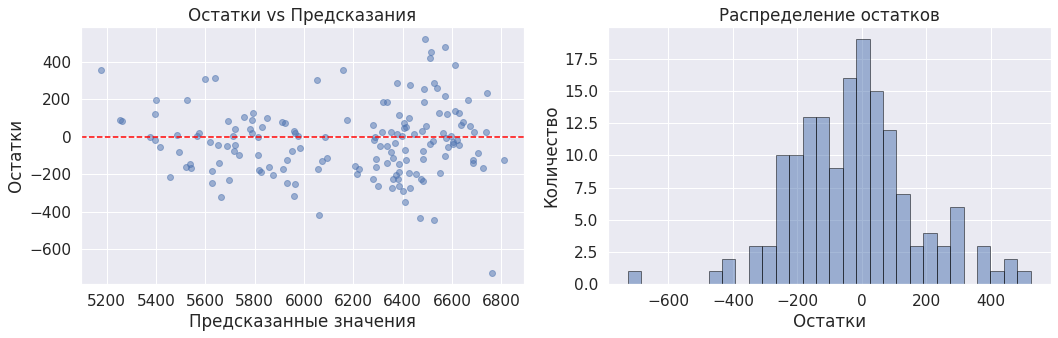

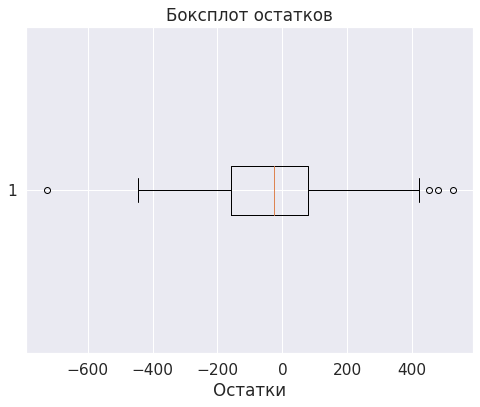

In [ ]:
# Преобразование нелинейных признаков
# 1. СПО (spo_ratio) → бинарный категориальный признак
spo_threshold = 0.92  # Граница, определенная из диаграммы рассеяния
farm_data['spo_category'] = (farm_data['spo_ratio'] > spo_threshold).astype(int)

# 2. ЭКЕ → добавление квадратичного признака
farm_data['eke_squared'] = farm_data['eke_energy_feed_unit'] ** 2

# Отбор признаков
numeric_features = [
    'raw_protein_g',
    'fat_percentage',
    'protein_percentage',
    'eke_squared'  # Заменяем исходный eke на квадрат
]

categorical_features = [
    'breed',
    'pasture_type',
    'bull_breed',
    'age',
    'spo_category'  # Добавляем новый бинарный признак
]

# Исключаем исходные нелинейные признаки
excluded_features = ['spo_ratio', 'eke_energy_feed_unit']

# Разделение на train/test
X = farm_data[categorical_features + numeric_features]
y = farm_data['milk_yield_kg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Пайплайн для преобразований
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='error'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Создание модели
model_2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Обучение модели
model_2.fit(X_train, y_train)

# Прогнозирование
y_pred = model_2.predict(X_test)

# Оценка качества
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
variance_residuals = np.var(y_test - y_pred)

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Дисперсия остатков: {variance_residuals:.4f}")

# Анализ остатков
residuals = y_test - y_pred

# Графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.scatter(y_pred, residuals, alpha=0.5)
ax1.axhline(0, color='red', linestyle='--')
ax1.set_xlabel('Предсказанные значения')
ax1.set_ylabel('Остатки')
ax1.set_title('Остатки vs Предсказания')

ax2.hist(residuals, bins=30, edgecolor='black', alpha=0.5)
ax2.set_xlabel('Остатки')
ax2.set_ylabel('Количество')
ax2.set_title('Распределение остатков')
plt.tight_layout()
plt.show()

# Боксплот дисперсии остатков
plt.figure(figsize=(8, 6))
plt.boxplot(residuals, vert=False)
plt.xlabel('Остатки')
plt.title('Боксплот остатков')
plt.show()


<div class='alert alert-info'><b>
Вывод:</b>
    
Коэффициент детерминации лучше предыдущего — модель предсказывает удой в 81,88 % случаев.

Остатки случайно распределены вокруг нуля, модель хорошо описывает данные.
    
Остатки нормально распределены, но график несимметричен со смещением влево. Модель переоценивает реальные значения целевого признака.

R² не очень высокое, так как линейная регрессия не учитывает дополнительные признаки.
</div>

### Обучение третьей модели LinearRegression





<div class='alert alert-info'><b>
Комментарии:</b>
    
Подготовим данные датасета ferma_main.csv и обучим третью модель LinearRegression. Используем в качестве целевого признак "Удой, кг".
    
Добавьте признак Имя папы коровы из файла ferma_dad.csv, соединив  с остальными данными ferma_main.csv по ключу 'id'.

Отберем признаки, которые подходят для модели линейной регрессии.

Количественные: 'raw_protein_g', 'fat_percentage', 'protein_percentage', 'eke_squared'

Категориальные: 'breed', 'pasture_type', 'bull_breed', 'age', 'spo_category', 'dad_name'
    
Исключены признаки:'spo_ratio', 'eke_energy_feed_unit' и 'milk_taste', субъективный параметр, не имеющий с удоем причинно-следственной связи.

Обоснование выбора признаков: Энергетическая ценность корма, содержание протеина, категория Сахаро-протеинового соотношения и тип пастбища напрямую влияют на продуктивность. Порода коров и быков-производителей определяют генетический потенциал. Возраст связан с физиологической производительностью.</div>

R²: 0.8242
MSE: 35794.8713
MAE: 144.7829
RMSE: 189.1953
Дисперсия остатков: 35540.8812


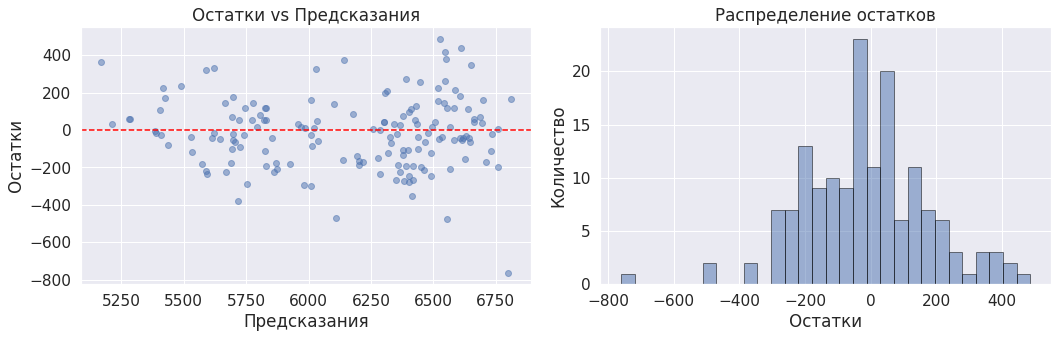

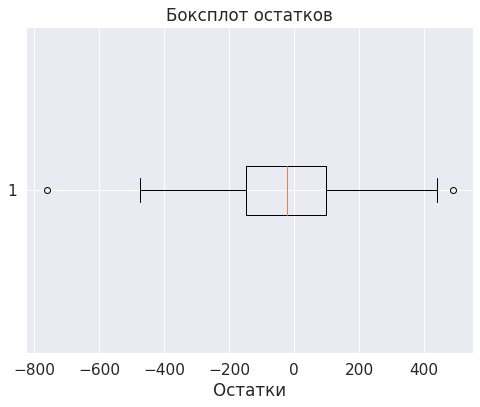

In [ ]:
# Объединение данных по id
df = pd.merge(farm_data, dads_data, on='id', how='left')

# Преобразование нелинейных признаков (как в предыдущей модели)
df['spo_category'] = (df['spo_ratio'] > 0.92).astype(int)
df['eke_squared'] = df['eke_energy_feed_unit'] ** 2

# Отбор признаков
numeric_features = [
    'raw_protein_g',
    'fat_percentage',
    'protein_percentage',
    'eke_squared'
]

categorical_features = [
    'breed',
    'pasture_type',
    'bull_breed',
    'age',
    'spo_category',
    'dad_name'  # Новый признак
]

# Исключенные признаки
excluded_features = ['spo_ratio', 'eke_energy_feed_unit', 'milk_taste']

# Разделение данных
X = df[categorical_features + numeric_features]
y = df['milk_yield_kg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Пайплайн
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='error'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model_3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Обучение
model_3.fit(X_train, y_train)
y_pred = model_3.predict(X_test)

# Оценка
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.4f}")

# Метрики
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
variance_residuals = np.var(y_test - y_pred)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Дисперсия остатков: {variance_residuals:.4f}")

# Анализ остатков
residuals = y_test - y_pred
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.scatter(y_pred, residuals, alpha=0.5)
ax1.axhline(0, color='red', linestyle='--')
ax1.set_xlabel('Предсказания'), ax1.set_ylabel('Остатки'), ax1.set_title('Остатки vs Предсказания')
ax2.hist(residuals, bins=30, edgecolor='black', alpha=0.5)
ax2.set_xlabel('Остатки'), ax2.set_ylabel('Количество'), ax2.set_title('Распределение остатков')
plt.tight_layout()
plt.show()

# Боксплот дисперсии остатков
plt.figure(figsize=(8, 6))
plt.boxplot(residuals, vert=False)
plt.title('Боксплот остатков')
plt.xlabel('Остатки')
plt.show()


In [ ]:
# Доверительный интервал
interval = stats.norm.interval(confidence=0.95, loc=np.mean(y_pred), scale=stats.sem(y_pred))
print(f'Доверительный интервал (95%) модели линейной регрессии model_3: {interval[0].round(2)} - {interval[1].round(2)} кг удоя в год')


Доверительный интервал (95%) модели линейной регрессии model_3: 6092.12 - 6223.06 кг удоя в год


# <div class='alert alert-info'><b>
Комментарии:</b>
    
Доверительный интервал (95%) модели - 6092-6223 кг удоя.</div>

<div class='alert alert-info'><b>
Вывод:</b>
    
Коэффициент детерминации лучше предыдущего — модель предсказывает удой в 82,42 % случаев.

Остатки случайно распределены вокруг нуля, модель хорошо описывает данные.
    
Остатки нормально распределены, но график несимметричен с выбросами слева.

Модель показывает лучшие результаты по сравнению с двумя предыдущими.
</div>


### Прогноз удоя коров «ЭкоФермы»

<div class='alert alert-info'><b>
Комментарии:</b>
    
С помощью лучшей модели спрогнозируем удой коров, которых фермер хочет купить.
    
Данные находятся в датасете cows_data. Необходимо добавить недостающие признаки квадрат ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и категорию СПО (Сахаро-протеиновое соотношение).
    
Возьмем из датасета farm_data средние значения каждого из этих признаков и увеличим на 5%. Выполним подготовку данных, аналогичную тренировочной выборке.

Получим прогноз удоя коров.
</div>

In [ ]:
# Выбор нужных данных из столбцов farm_data
eke_avg = farm_data['eke_energy_feed_unit'].mean() * 1.05
raw_protein_avg = farm_data['raw_protein_g'].mean() * 1.05
spo_ratio_avg = farm_data['spo_ratio'].mean() * 1.05

# Создание новых столбцов в cows_data
cows_data['eke_energy_feed_unit'] = eke_avg
cows_data['raw_protein_g'] = raw_protein_avg
cows_data['spo_ratio'] = spo_ratio_avg
cows_data['spo_category'] = (cows_data['spo_ratio'] > 0.92).astype(int)
cows_data['eke_squared'] = cows_data['eke_energy_feed_unit'] ** 2

# Назначение новых индексов строк
cows_data.index = range(1, len(cows_data) + 1)

# Удаление ненужных столбцов
cows_data = cows_data.drop(['spo_ratio', 'eke_energy_feed_unit'], axis=1)

print(list(cows_data.columns))

cows_data.head(20)


['breed', 'pasture_type', 'bull_breed', 'dad_name', 'fat_percentage', 'protein_percentage', 'age', 'raw_protein_g', 'spo_category', 'eke_squared']


,breed,pasture_type,bull_breed,dad_name,fat_percentage,protein_percentage,age,raw_protein_g,spo_category,eke_squared
1,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2019.947532,1,233.361138
2,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,2019.947532,1,233.361138
3,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,2019.947532,1,233.361138
4,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,2019.947532,1,233.361138
5,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,2019.947532,1,233.361138
6,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,2019.947532,1,233.361138
7,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2019.947532,1,233.361138
8,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,2019.947532,1,233.361138
9,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,2019.947532,1,233.361138
10,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,2019.947532,1,233.361138


In [ ]:
# Числовые признаки
numeric_features = ['raw_protein_g', 'fat_percentage', 'protein_percentage', 'eke_squared']

# Категориальные признаки
categorical_features = ['breed', 'pasture_type', 'bull_breed', 'age', 'spo_category', 'dad_name']

# Выделение признаков для предсказания
X_new = cows_data[categorical_features + numeric_features]

# Предсказание
predictions = model_3.predict(X_new)

# Добавление предсказаний в датафрейм
cows_data['milk_yield_kg'] = predictions

print(cows_data[['breed', 'pasture_type', 'bull_breed', 'age', 'milk_yield_kg']].head(20))


              breed pasture_type bull_breed          age  milk_yield_kg
1    Вис Бик Айдиал    Холмистое     Айдиал  более_2_лет    6598.321015
2    Вис Бик Айдиал    Равнинное    Соверин  менее_2_лет    6311.454708
3   РефлешнСоверинг    Равнинное    Соверин  более_2_лет    6264.486892
4   РефлешнСоверинг    Холмистое     Айдиал  более_2_лет    6690.746017
5   РефлешнСоверинг    Равнинное     Айдиал  более_2_лет    6541.090343
6   РефлешнСоверинг    Равнинное    Соверин  менее_2_лет    6635.758361
7    Вис Бик Айдиал    Холмистое     Айдиал  более_2_лет    6598.321015
8    Вис Бик Айдиал    Равнинное    Соверин  более_2_лет    6514.745891
9   РефлешнСоверинг    Равнинное    Соверин  более_2_лет    6264.486892
10  РефлешнСоверинг    Холмистое     Айдиал  менее_2_лет    6329.932410
11   Вис Бик Айдиал    Холмистое    Соверин  более_2_лет    6570.887149
12  РефлешнСоверинг    Равнинное    Соверин  более_2_лет    6628.145103
13   Вис Бик Айдиал    Холмистое     Айдиал  более_2_лет    6924

In [ ]:
cows_data['milk_yield_kg'].describe()

count      20.000000
mean     6499.970397
std       198.251802
min      6110.423731
25%      6322.138048
50%      6555.988746
75%      6630.048417
max      6924.593451
Name: milk_yield_kg, dtype: float64

<div class='alert alert-info'><b>
Вывод:</b>

Прогноз удоя всех коров «ЭкоФермы» больше 6000 кг/год. Среднее значение - 6500 кг/год.

Для окончательного решения о покупке коров, необходимо провести обучение модели логистической регрессии по целевому признаку "Вкус молока".
</div>


## Обучение модели логистической регрессии

### Обучение модели LogisticRegression на объединенном датафрейме farm_data и dads_data

Accuracy: 0.6242
Recall: 0.8636
Precision: 0.6179
Матрица ошибок:
[[22 47]
 [12 76]]


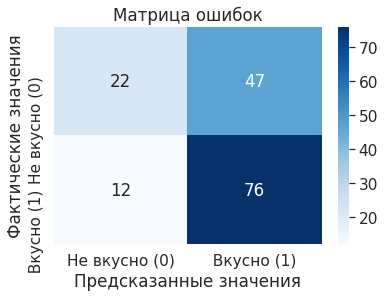

In [ ]:
# Объединение данных по id
df_log = pd.merge(farm_data, dads_data, on='id', how='left')


# Преобразование целевого признака в бинарный формат
df_log['milk_taste'] = df_log['milk_taste'].replace({'вкусно': 1, 'не вкусно': 0})

# Определение признаков
numeric_features = [
    'milk_yield_kg', 'raw_protein_g', 'fat_percentage', 'protein_percentage', 'eke_squared'
]

categorical_features = [
    'breed', 'pasture_type', 'bull_breed', 'spo_category', 'dad_name', 'age'
]

# Разделение данных на признаки и целевую переменную
X = df_log[numeric_features + categorical_features]
y = df_log['milk_taste']


# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Создание пайплайна для обработки данных
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first')) # Удален первый фиктивный столбец
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Создание пайплайна для модели
model_log = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Обучение модели
model_log.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model_log.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:")
print(conf_matrix)

# Визуализация матрицы ошибок
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Не вкусно (0)', '  Вкусно (1)  '],
            yticklabels=['Не вкусно (0)', '  Вкусно (1) '])
plt.xlabel('Предсказанные значения')
plt.ylabel('Фактические значения')
plt.title('Матрица ошибок')
plt.show()

<div class='alert alert-info'><b>
Комментарии:</b>
    
Модель 47 раз ошибочно предсказывает вкусное молоко вкусное и 12 раз, что не вкусное. Для фермера главное условие, чтобы молоко было вкусное, поэтому ошибка 1-ого рода критична. Покупка коров с невкусным молоком может негативно отразиться на доходе фермы.
    
Свести критическую ошибку 1-ого рода к нулю можно изменением порога принадлежности к классам.
    
Метрика Precision (0,62) показывает долю правильных положительных прогнозов относительно всех положительных прогнозов, сделанных моделью. Чем выше точность, тем меньше вероятность ложных срабатываний.
    
Recall (0,86) показывает, какая доля реальных положительных примеров была правильно определена моделью.</div>

<div class='alert alert-info'><b>
Комментарий:</b>
    
Удален первый фиктивный столбец, который может появиться после выполнения OneHotEncoding для категориальных переменных. Проверка объединенного датафрейма df_log на пропущенный значения и бесконечность не требуется</div>

### Сведение критической ошибки 1-ого рода к нулю

Новый порог: 0.8119
Новая Accuracy: 0.4904
Новый Recall: 0.0909
Новая Precision: 1.0000
Новая матрица ошибок:
[[69  0]
 [80  8]]


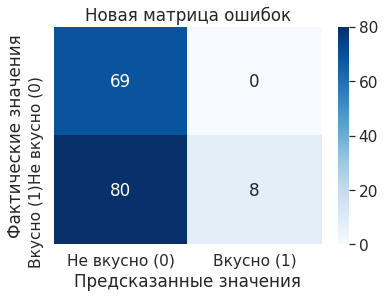

In [ ]:
# Получение вероятностей для класса 1 (вкусно)
y_pred_proba = model_log.predict_proba(X_test)[:, 1]

# Построение precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Нахождение порога, при котором precision = 1 (FP = 0)
threshold = thresholds[np.argmax(precision == 1)]

# Применение нового порога
y_pred_new_threshold = (y_pred_proba >= threshold).astype(int)

# Пересчет метрик
new_accuracy = accuracy_score(y_test, y_pred_new_threshold)
new_recall = recall_score(y_test, y_pred_new_threshold)
new_precision = precision_score(y_test, y_pred_new_threshold)

print(f"Новый порог: {threshold:.4f}")
print(f"Новая Accuracy: {new_accuracy:.4f}")
print(f"Новый Recall: {new_recall:.4f}")
print(f"Новая Precision: {new_precision:.4f}")

# Новая матрица ошибок
new_conf_matrix = confusion_matrix(y_test, y_pred_new_threshold)
print("Новая матрица ошибок:")
print(new_conf_matrix)

# Визуализация новой матрицы ошибок
sns.heatmap(new_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Не вкусно (0)', 'Вкусно (1)'],
            yticklabels=['Не вкусно (0)', 'Вкусно (1)'])
plt.xlabel('Предсказанные значения')
plt.ylabel('Фактические значения')
plt.title('Новая матрица ошибок')
plt.show()

<div class='alert alert-info'><b>
Комментарии:</b>
    
Чтобы ячейка выполнялась, добавлен импорт функции precision_recall_curve из модуля sklearn.metrics</div>

In [ ]:
# Подготовка датафрейма для логистической регрессии
# Сброс индекса и создание нового, начиная с 0
cows_data = cows_data.reset_index(drop=True)
cows_data.head(20)

,breed,pasture_type,bull_breed,dad_name,fat_percentage,protein_percentage,age,raw_protein_g,spo_category,eke_squared,milk_yield_kg
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2019.947532,1,233.361138,6598.321015
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,2019.947532,1,233.361138,6311.454708
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,2019.947532,1,233.361138,6264.486892
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,2019.947532,1,233.361138,6690.746017
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,2019.947532,1,233.361138,6541.090343
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,2019.947532,1,233.361138,6635.758361
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2019.947532,1,233.361138,6598.321015
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,2019.947532,1,233.361138,6514.745891
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,2019.947532,1,233.361138,6264.486892
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,2019.947532,1,233.361138,6329.932410


### Применение логистической регрессии с пороговым значением к датафрейму cows_data

In [ ]:
# Определение признаков
numeric_features = [
    'milk_yield_kg', 'raw_protein_g', 'fat_percentage', 'protein_percentage', 'eke_squared'
]

categorical_features = [
    'breed', 'pasture_type', 'bull_breed', 'spo_category', 'dad_name', 'age'
]

# Извлечение признаков
X_new = cows_data[numeric_features + categorical_features]

# Получение вероятностей классов
probabilities = model_log.predict_proba(X_new)

# Применение нового порога для классификации
new_threshold = 0.8119
predictions = probabilities[:, 1] > new_threshold

# Сохраняем результаты в датафрейм
results_df = pd.DataFrame({
    'milk_taste': predictions,
    'probability': probabilities[:, 1]
})

# Объединяем с исходным датафреймом
final_results = pd.concat([cows_data, results_df], axis=1)

# Определение признаков для вывода на печать
features = [
    'breed', 'pasture_type', 'bull_breed', 'dad_name', 'age', 'milk_taste', 'probability'
]

# Выбор только выбранных признаков из final_results
categorical_results = final_results[features]



# Вывод результата
print(categorical_results)

              breed pasture_type bull_breed  dad_name          age  milk_taste  probability
0    Вис Бик Айдиал    Холмистое     Айдиал  Геркулес  более_2_лет       False     0.703299
1    Вис Бик Айдиал    Равнинное    Соверин    Буйный  менее_2_лет       False     0.648941
2   РефлешнСоверинг    Равнинное    Соверин     Барин  более_2_лет       False     0.572026
3   РефлешнСоверинг    Холмистое     Айдиал    Буйный  более_2_лет       False     0.356996
4   РефлешнСоверинг    Равнинное     Айдиал    Буйный  более_2_лет       False     0.553080
5   РефлешнСоверинг    Равнинное    Соверин  Геркулес  менее_2_лет       False     0.097283
6    Вис Бик Айдиал    Холмистое     Айдиал  Геркулес  более_2_лет       False     0.703299
7    Вис Бик Айдиал    Равнинное    Соверин    Буйный  более_2_лет       False     0.649795
8   РефлешнСоверинг    Равнинное    Соверин     Барин  более_2_лет       False     0.572026
9   РефлешнСоверинг    Холмистое     Айдиал    Буйный  менее_2_лет       False  

<div class='alert alert-info'><b>
Комментарий:</b>

В результате получилось, что у всех коров «ЭкоФермы» молоко не вкусное.
Гарантировать вкусное молоко нельзя ни у одной коровы, но фермер может сам оценить вероятность вкусного молока и поросить скидку на некоторых коров.
</div>

## Итоговые выводы

In [ ]:
# Определение признаков для вывода на печать
features = [
    'breed', 'pasture_type', 'bull_breed', 'dad_name', 'age', 'milk_taste', 'milk_yield_kg'
]

# Выбор только определенных признаков из final_results
categorical_results = final_results[features]

# Вывод результата
print(categorical_results)

              breed pasture_type bull_breed  dad_name          age  milk_taste  milk_yield_kg
0    Вис Бик Айдиал    Холмистое     Айдиал  Геркулес  более_2_лет       False    6598.321015
1    Вис Бик Айдиал    Равнинное    Соверин    Буйный  менее_2_лет       False    6311.454708
2   РефлешнСоверинг    Равнинное    Соверин     Барин  более_2_лет       False    6264.486892
3   РефлешнСоверинг    Холмистое     Айдиал    Буйный  более_2_лет       False    6690.746017
4   РефлешнСоверинг    Равнинное     Айдиал    Буйный  более_2_лет       False    6541.090343
5   РефлешнСоверинг    Равнинное    Соверин  Геркулес  менее_2_лет       False    6635.758361
6    Вис Бик Айдиал    Холмистое     Айдиал  Геркулес  более_2_лет       False    6598.321015
7    Вис Бик Айдиал    Равнинное    Соверин    Буйный  более_2_лет       False    6514.745891
8   РефлешнСоверинг    Равнинное    Соверин     Барин  более_2_лет       False    6264.486892
9   РефлешнСоверинг    Холмистое     Айдиал    Буйный  менее

<div class='alert alert-info'><b>
Вывод:</b>

После обучения модели логистической регресии применили порога классификации (0,8061) к датафрейму cows_data, при котором ошибки 1-ого рода сводятся к нулю.

В результате получилось, что у всех коров «ЭкоФермы», несмотря на высокий предсказанный удой > 6000 кг/год, молоко не вкусное.

Поэтому фермеру лучше воздержаться от покупки новых коров «ЭкоФермы».</div>

<div class='alert alert-info'><b>
Общий вывод:</b>

В процессе разработки модели МО, позволяющей спрогнозировать годовой удой и вкус молока коров:
    
1. Загружены данные и изучена информация о коровах фермера и фирмы «ЭкоФерма».

2. Проведена преобработка данных: изменены названия столбцов, исправлены типы данных. Проверены и ликвидированы пропуски и дубликаты, в том числе неявные. Названия колонок приведены к нижнему регистру.

3. Проведен исследовательский анализ данных. Удален значительный выброс признака "Удой". Признак СПО  (Сахаро-протеиновое соотношение) переведен в категориальный тип.
    
4. Проведен корреляционный анализ данных. Обнаружена высокая зависимость удоя от характеристик корма. Также на производительность влияют генетические признаки и возраст коровы.

5. Построены три модели линейной регрессии на основе данных о коровах фермера. На основе лучшей модели (R² = 0.8242), где СПО перевели в категориальный признак, ЭКЕ возвели в квадрат и добавили имена пап коров, был спрогнозирован удой коров «ЭкоФермы».

6. Построена модель логистической регрессии для датафрейма коров фермера. Опеределен порог классификации (0,8061), при котором ошибка 1-ого рода сведена к нулю. После спрогнозировали вкус молока для коров «ЭкоФермы».

Все коровы из датафрейма cows_data могут давать молока больше 6000 кг/год, но молоко не вкусное. Поэтому фермеру не стоит рисковать покупать коров «ЭкоФермы».</div>